In [3]:
# import system modules
import sys
import os
import gc
import argparse

# import standard numerical modules
import numpy as np
import math

import matplotlib.pyplot as plt

# import machine learning modules
import tensorflow as tf
import keras.backend as K

sys.path.append('../')
import DCTR


# Process Data

In [4]:
data_dir = '../../Data'
num_events = 9656913 # used to be num_events = 9686913 = num MiNNLO events # but 3 files = 30000 events are corrupted in latest run


## hvq dielptonic


In [70]:
# dileptonic hvq has 1M events per LHE

X0 = []
X0_nJets = []
X0_jet = []
X0_b_jets = []
X0_b_quarks = []
X0_W_lepton = []

skipped_files = [1, 8, 10, 12, 14, 18] # due to corrupted files

for i in range(1, 21):
    if i in skipped_files:
        print(f'file {i} is skipped, due to likely corruption')
        continue
    '''
    elif len(X0)>= num_events:
        print('Loaded num_events')
        break
    '''
    try:
        X0.extend(
            np.load(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/converted_lhe_hvq_dileptonic_1M_{i}_b-filtered.npy')
        )
        X0_nJets.extend(
            np.load(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/jet_multiplicity_hvq_dileptonic_1M_{i}_b-filtered.npy')
        )
        X0_jet.extend(
            np.load(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/jet_4vectors_hvq_dileptonic_1M_{i}_b-filtered.npy')
        )
        X0_b_jets.extend(
            np.load(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/b_jets_hvq_dileptonic_1M_{i}_b-filtered.npy')
        )
        X0_b_quarks.extend(
            np.load(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/b_quarks_hvq_dileptonic_1M_{i}_b-filtered.npy')
        )
        X0_W_lepton.extend(
            np.load(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/W_and_lepton_hvq_dileptonic_1M_{i}_b-filtered.npy')
        )
        print(f'read {i} files')
    except:
        print(f"Files {i} can't be opened and are likely corrput")

X0 = np.array(X0)
print(X0.shape)

# nrm data and save to disk (only needed to run once)

nrm_array_dir = f'{data_dir}/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X0_nrm, _ = DCTR.normalize_data(X0.copy(), nrm_array)
X0_nrm = np.array(X0_nrm)
np.save(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/normed_lhe_hvq_dileptonic_1M_1-20_b-filtered.npy', X0_nrm)


X0       = np.array(X0[:num_events])
X0_nJets = np.array(X0_nJets[:num_events])
X0_jet   = np.array(X0_jet[:num_events])

X0_b_jets    = np.array(X0_b_jets[:num_events])
X0_b_quarks  = np.array(X0_b_quarks[:num_events])
X0_W_lepton = np.array(X0_W_lepton[:num_events])

X0_nrm = np.load(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/normed_lhe_hvq_dileptonic_1M_1-20_b-filtered.npy')[:num_events]
X0_wgt = X0_nJets[:,1]

print(X0.shape)
print(X0_nrm.shape)
print(X0_nJets.shape)
print(X0_jet.shape)


file 1 is skipped, due to likely corruption
read 2 files
read 3 files
read 4 files
read 5 files
read 6 files
read 7 files
file 8 is skipped, due to likely corruption
read 9 files
file 10 is skipped, due to likely corruption
read 11 files
file 12 is skipped, due to likely corruption
read 13 files
file 14 is skipped, due to likely corruption
read 15 files
read 16 files
read 17 files
file 18 is skipped, due to likely corruption
read 19 files
read 20 files
(14000000, 3, 9)
(9656913, 3, 9)
(9656913, 3, 9)
(9656913, 2)
(9656913, 20, 6)


In [72]:
skipped_files = [1, 8, 10, 12, 14, 18]

np.save(f'{data_dir}/POWHEG_hvq/dileptonic/20240915/normed_lhe_hvq_dileptonic_1M_skipped_files.txt', skipped_files)


## MiNNLO

In [75]:
gc.collect()


0

In [76]:
# MiNNLO has 10k events per lhe

X1 = []
X1_nJets = []
X1_jet = []

X1_b_jets = []
X1_b_quarks = []
X1_W_lepton = []

skipped_files = [106, 126, 210]


for i in range(1, 1001):
    if i in skipped_files:
        print(f'file {i} is skipped, due to likely corruption')
        continue
    '''
    elif len(X0)>= num_events:
        print('Loaded num_events')
        break
    '''
    try:
        X1.extend(
            np.load(f'{data_dir}/MiNNLO/showered/20240915/converted_lhe_MiNNLO_10K_{i}_b-filtered.npy')
        )
        X1_nJets.extend(
            np.load(f'{data_dir}/MiNNLO/showered/20240915/jet_multiplicity_MiNNLO_10K_{i}_b-filtered.npy')
        )
        X1_jet.extend(
            np.load(f'{data_dir}/MiNNLO/showered/20240915/jet_4vectors_MiNNLO_10K_{i}_b-filtered.npy')
        )
        X1_b_jets.extend(
            np.load(f'{data_dir}/MiNNLO/showered/20240915/b_jets_MiNNLO_10K_{i}_b-filtered.npy')
        )
        X1_b_quarks.extend(
            np.load(f'{data_dir}/MiNNLO/showered/20240915/b_quarks_MiNNLO_10K_{i}_b-filtered.npy')
        )
        X1_W_lepton.extend(
            np.load(f'{data_dir}/MiNNLO/showered/20240915/W_and_lepton_MiNNLO_10K_{i}_b-filtered.npy')
        )
    except:
        print(f"Files {i} can't be opened and are likely corrput")
    if i % 50 == 0:
        print(f'read {i} files')

X1 = np.array(X1)
print(X1.shape)

# nrm data and save to disk (only needed to run once)

nrm_array_dir = f'{data_dir}/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X1_nrm, _ = DCTR.normalize_data(X1.copy(), nrm_array)
np.save(f'{data_dir}/MiNNLO/showered/20240903/normed_lhe_MiNNLO_10K_1-1000_b-filtered.npy', X1_nrm)


X1       = np.array(X1[:num_events])
X1_nJets = np.array(X1_nJets[:num_events])
X1_jet   = np.array(X1_jet[:num_events])

X1_b_jets   = np.array(X1_b_jets[:num_events])
X1_b_quarks = np.array(X1_b_quarks[:num_events])
X1_W_lepton = np.array(X1_W_lepton[:num_events])

X1_nrm = np.load(f'{data_dir}/MiNNLO/showered/20240903/normed_lhe_MiNNLO_10K_1-1000_b-filtered.npy')[:num_events]
X1_wgt = X1_nJets[:, 1]

print(X1.shape)
print(X1_nrm.shape)
print(X1_nJets.shape)
print(X1_jet.shape)


read 50 files
read 100 files
file 106 is skipped, due to likely corruption
file 126 is skipped, due to likely corruption
read 150 files
read 200 files
file 210 is skipped, due to likely corruption
read 250 files
read 300 files
read 350 files
read 400 files
read 450 files
read 500 files
read 550 files
read 600 files
read 650 files
read 700 files
read 750 files
read 800 files
read 850 files
read 900 files
read 950 files
read 1000 files
(9656913, 3, 9)
(9656913, 3, 9)
(9656913, 3, 9)
(9656913, 2)
(9656913, 20, 6)


In [77]:
skipped_files = [106, 126, 210]

np.save(f'{data_dir}/MiNNLO/showered/20240915/normed_lhe_MiNNLO_10K_skipped_files.txt', skipped_files)


In [78]:
print(X1_wgt)


[-103.245  103.245 -103.245 ...  103.245  103.245  103.245]


In [79]:
gc.collect()


748

In [80]:
print(X0.shape)
print(X0_nrm.shape)
print(X0_nJets.shape)
print(X0_jet.shape)

print(X0_b_jets.shape)
print(X0_b_quarks.shape)
print(X0_W_lepton.shape)



print(X1.shape)
print(X1_nrm.shape)
print(X1_nJets.shape)
print(X1_jet.shape)

print(X1_b_jets.shape)
print(X1_b_quarks.shape)
print(X1_W_lepton.shape)


(9656913, 3, 9)
(9656913, 3, 9)
(9656913, 2)
(9656913, 20, 6)
(9656913, 2, 6)
(9656913, 2, 7)
(9656913, 2, 7)
(9656913, 3, 9)
(9656913, 3, 9)
(9656913, 2)
(9656913, 20, 6)
(9656913, 2, 6)
(9656913, 2, 7)
(9656913, 2, 7)


# prepare datasets

In [81]:
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_nrm = np.delete(X0_nrm, 5, -1) # E
X0_nrm = np.delete(X0_nrm, 4, -1) # eta

# garbage collection after deleting to clear memory asap
print(gc.collect())

print(X0_nrm.shape)
print(X0_nrm[0])


0
(9656913, 3, 7)
[[-0.45074034  0.46573404 -1.16292049  0.63208929  0.          1.
   0.        ]
 [-0.07826688  1.18176553  0.85176292  0.17025515  0.6         1.
   0.        ]
 [ 0.22281834 -0.34165294 -0.93798461  0.92323992 -0.6         1.
   0.        ]]


# compare datasets before reweighting

## hvq vs MiNNLO

In [82]:
print(max(X0_nJets[:,0]))
print(max(X1_nJets[:,0]))


19.0
18.0


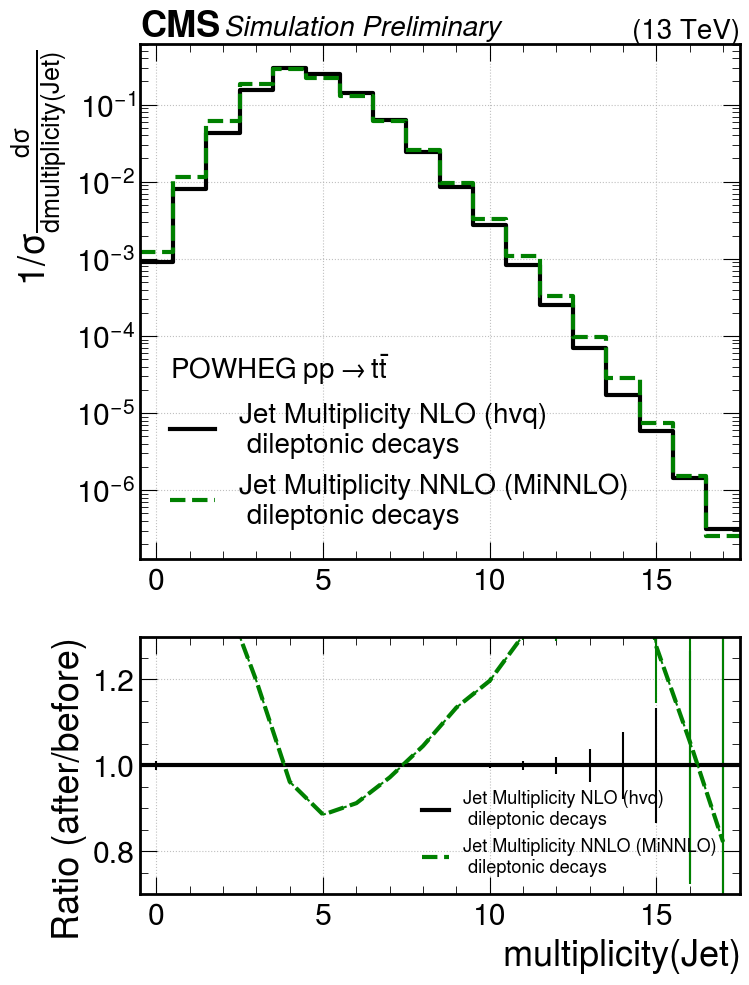

In [26]:
# jet multiplicity

args_multiplicity = [(X0_nJets[:,0], X0_wgt, 'Jet Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X1_nJets[:,0], X1_wgt, 'Jet Multiplicity NNLO (MiNNLO) \n dileptonic decays')]


bins = np.linspace(-0.5, 17.5, 19)

DCTR.plot_ratio_cms_2(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')



# DCTR reweighting


In [83]:
# calculate weights from DCTR trained on showered events
model = '../20240521_showered_new/train_20240523_regular_epochs.tf' # path to previously trained model (in .tf format (folder)) for showered events

dctr_rwgt = []
# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt = DCTR.get_rwgt([model], X0_nrm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook



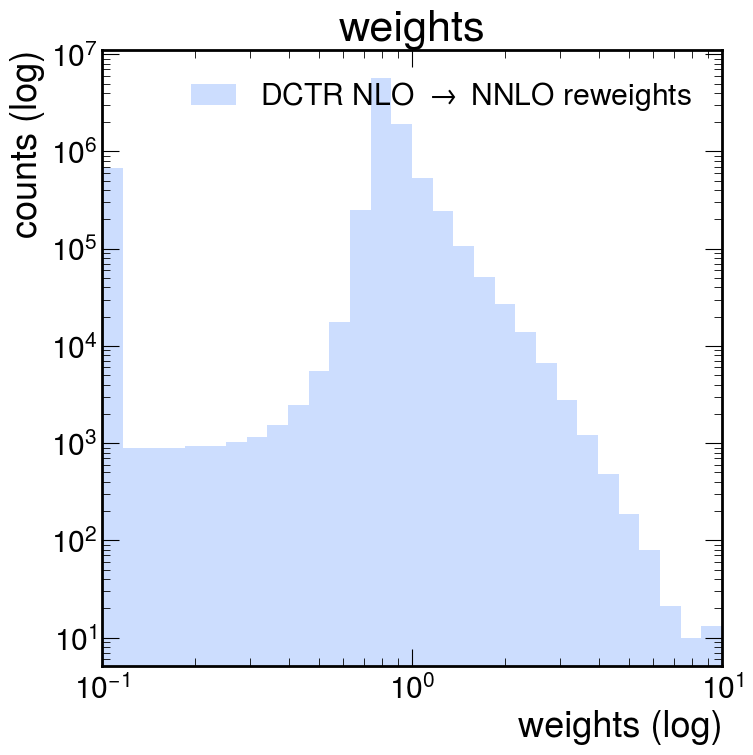

In [84]:
wgts_plot = [(dctr_rwgt[0], r'DCTR NLO $\to$ NNLO reweights')]

DCTR.plot_weights(wgts_plot, start = 0.1, stop = 10)

# apply orginal generator weights to rwgt
dctr_rwgt = np.multiply(dctr_rwgt[0], X0_wgt)



In [93]:
pythia_text=r'$POWHEG \; pp \to  t\bar{t}$ + PYTHIA'


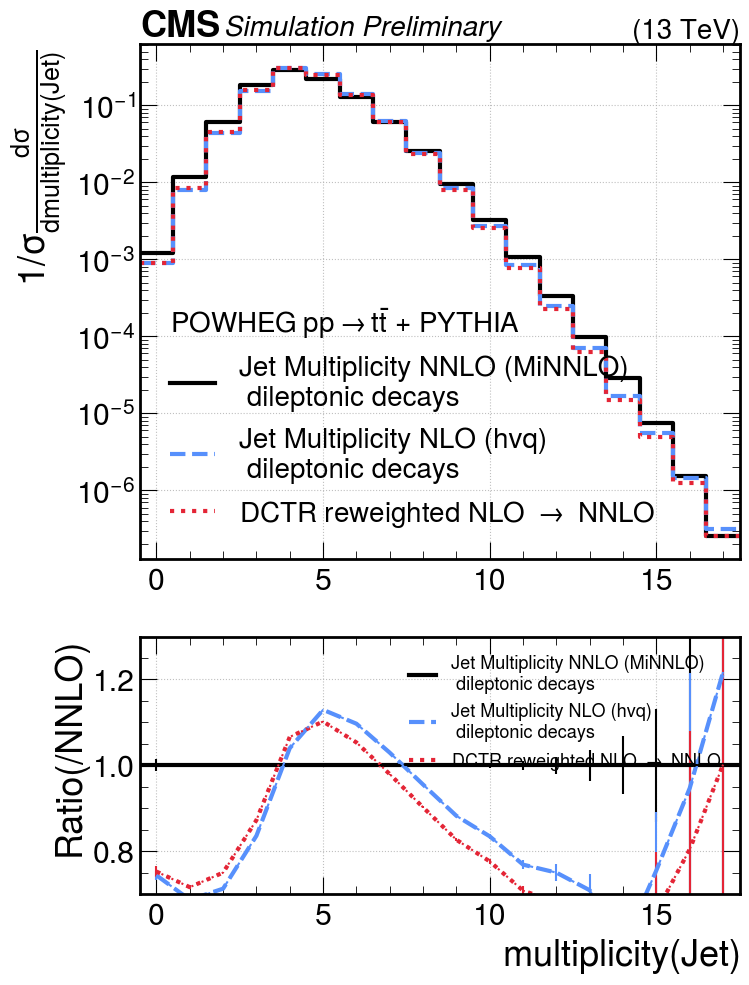

In [100]:
# jet multiplicity

args_multiplicity = [(X1_nJets[:,0], X1_wgt, 'Jet Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_nJets[:,0], X0_wgt, 'Jet Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_nJets[:,0], dctr_rwgt, r'DCTR reweighted NLO $\to$ NNLO')]

bins = np.linspace(-0.5, 17.5, 19)
ratio_ylim=[0.7, 1.3]

DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=ratio_ylim, part_label='Jet', arg_label='multiplicity', unit='', inv_unit='', pythia_text=pythia_text)


In [86]:
hists = np.load('./plots/tt-pair/plot_multiplicity_jet_histograms.npy', allow_pickle=True) # hist data is automatically saved to disk above

[dense_list, uncert_nrm_list, bin_edges] = hists

# print(dense_list)
print(np.sum(dense_list[0]))
print(np.sum(dense_list[1]))
print(np.sum(dense_list[2]))


1.0000002572078313
1.0000003131325157
1.0000002576588254


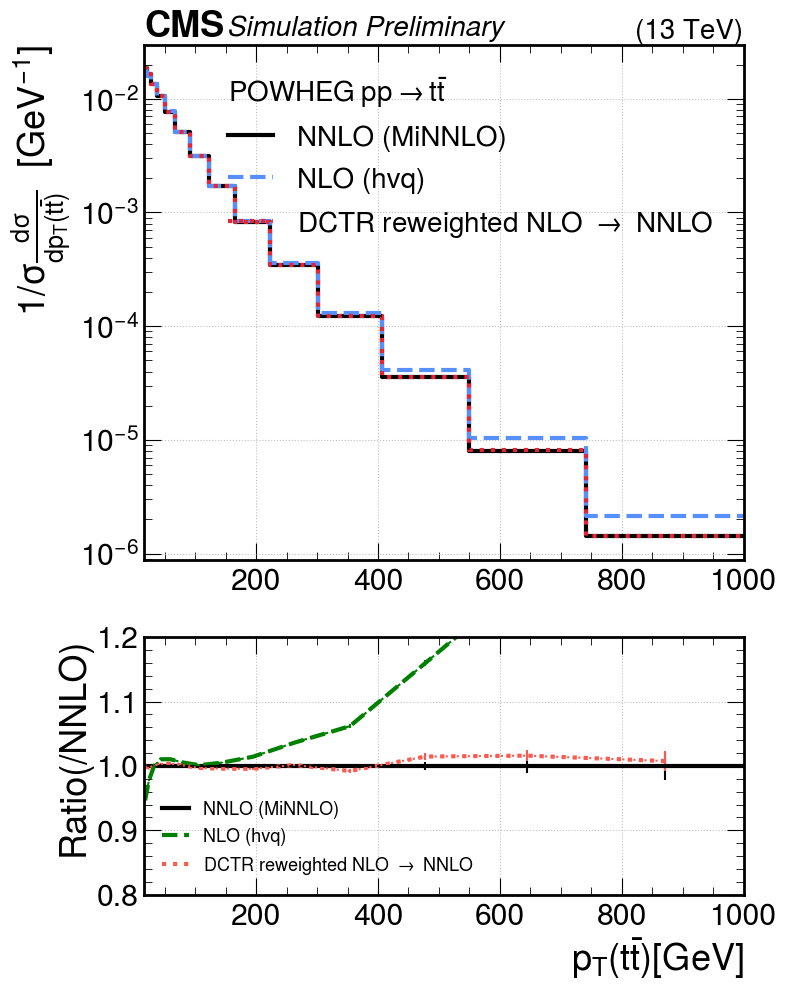

In [87]:
# pT to make sure our regular obs is working

args = [(X1, X1_wgt, 'NNLO (MiNNLO)'),
        (X0, X0_wgt, 'NLO (hvq)'),
        (X0, dctr_rwgt, r'DCTR reweighted NLO $\to$ NNLO')]


bins = np.logspace(np.log10(15), np.log10(1000), 15)

DCTR.plot_ratio_cms(args, bins = bins, y_scale = 'log', ratio_ylim=[0.8, 1.2], pythia_text=pythia_text)


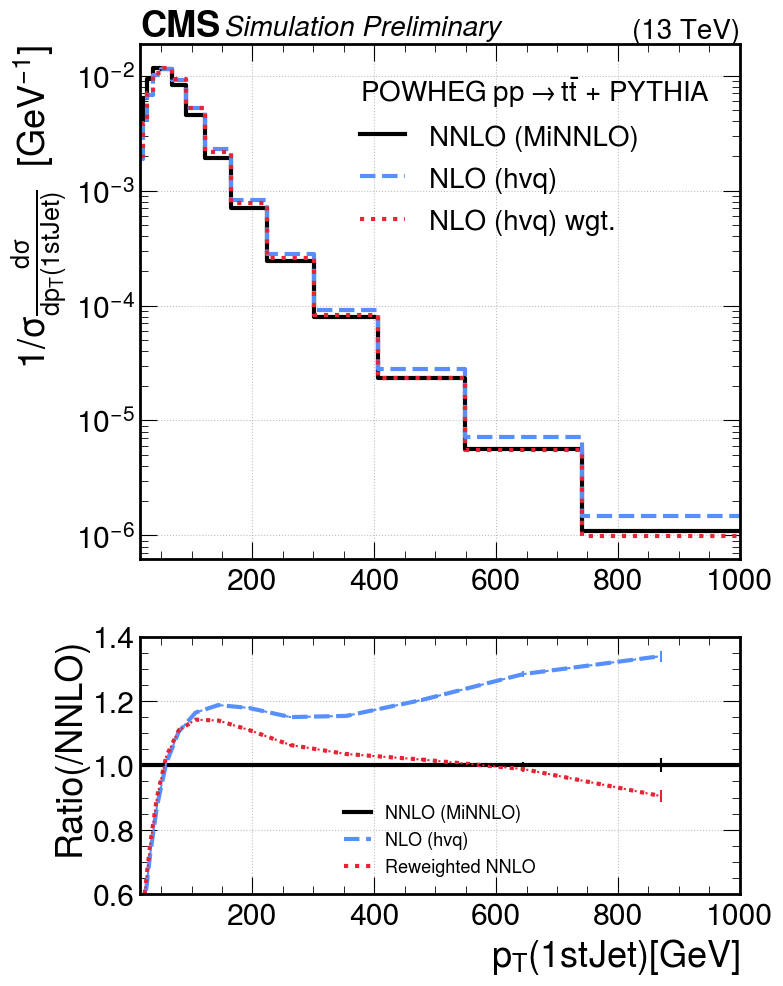

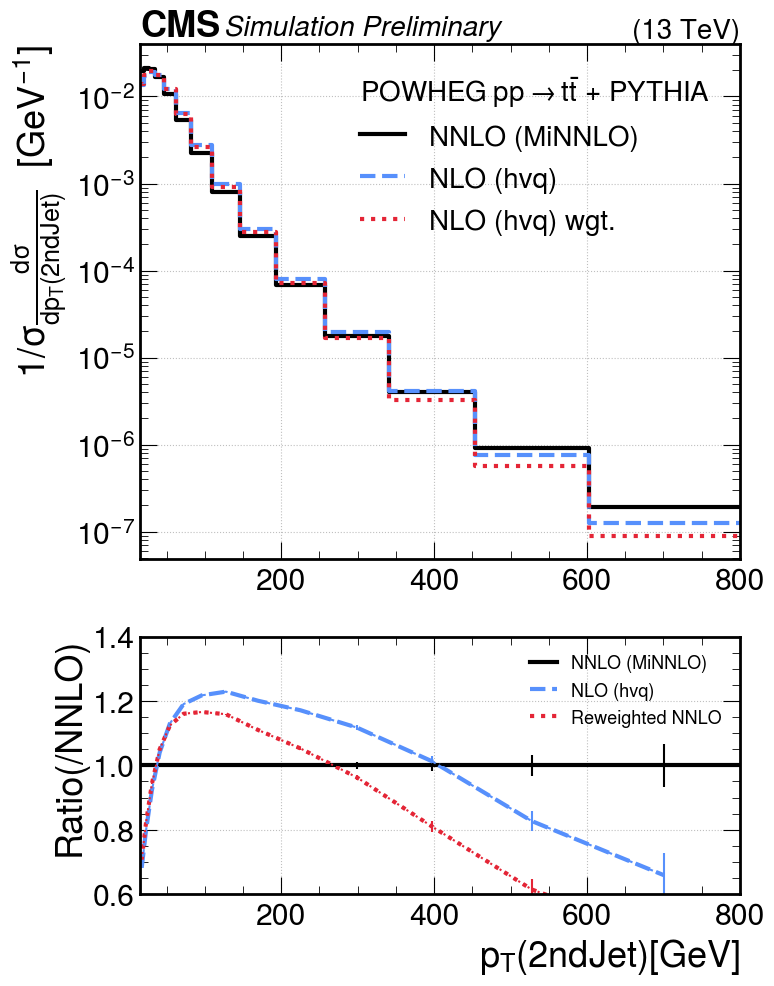

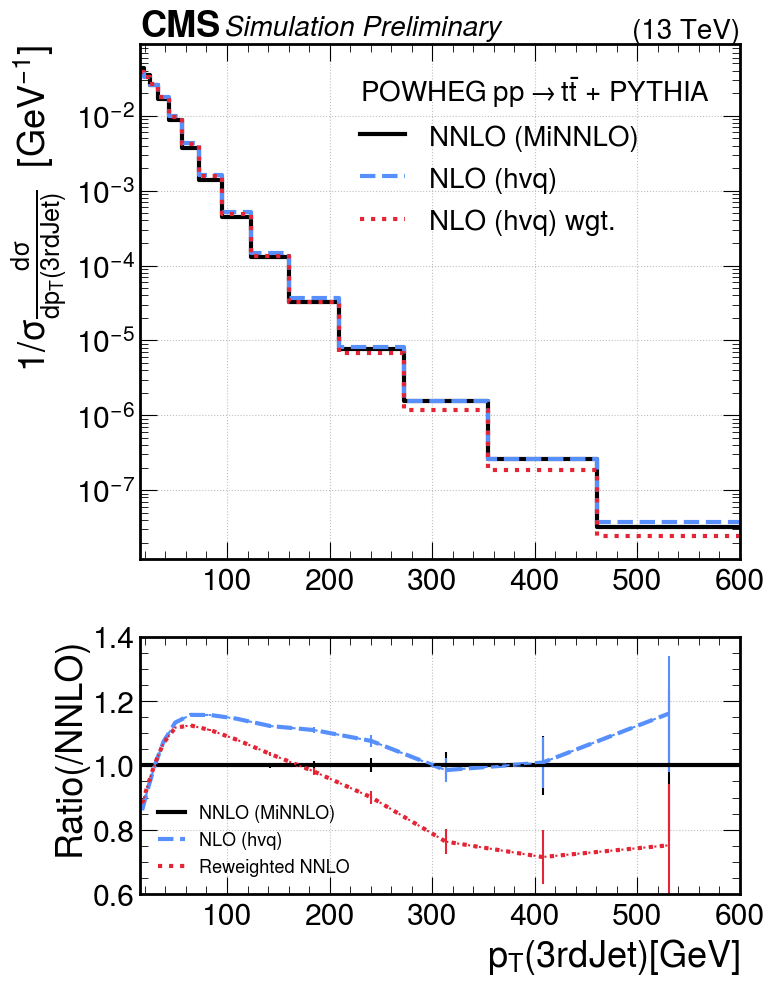

In [95]:
# jet pT

# 1st jet
log_bins = np.logspace(np.log10(15), np.log10(1000), 15)
args_jet_0 = [(X1_jet[:, 0, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 0, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 0, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_0, y_scale = 'log', part_label='1st Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text)

log_bins = np.logspace(np.log10(15), np.log10(800), 15)
args_jet_1 = [(X1_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 1, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_1, y_scale = 'log', part_label='2nd Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text)

log_bins = np.logspace(np.log10(15), np.log10(600), 15)
args_jet_2 = [(X1_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 2, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_2, y_scale = 'log', part_label='3rd Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text)



In [90]:
print(X0_b_jets.shape)
print(X1_b_jets.shape)


(9656913, 2, 6)
(9656913, 2, 6)


In [91]:
X0_b_jets_pt_concat = np.concatenate((X0_b_jets[:,0, 0], X0_b_jets[:,1, 0]))
X1_b_jets_pt_concat = np.concatenate((X1_b_jets[:,0, 0], X1_b_jets[:,1, 0]))

X0_wgt_concat = np.concatenate((X0_wgt, X0_wgt))
X1_wgt_concat = np.concatenate((X1_wgt, X1_wgt))

dctr_rwgt_concat = np.concatenate((dctr_rwgt, dctr_rwgt))

print(X0_b_jets_pt_concat.shape)
print(X1_b_jets_pt_concat.shape)

print(X0_wgt_concat.shape)
print(X1_wgt_concat.shape)

print(dctr_rwgt_concat.shape)

(19313826,)
(19313826,)
(19313826,)
(19313826,)
(19313826,)


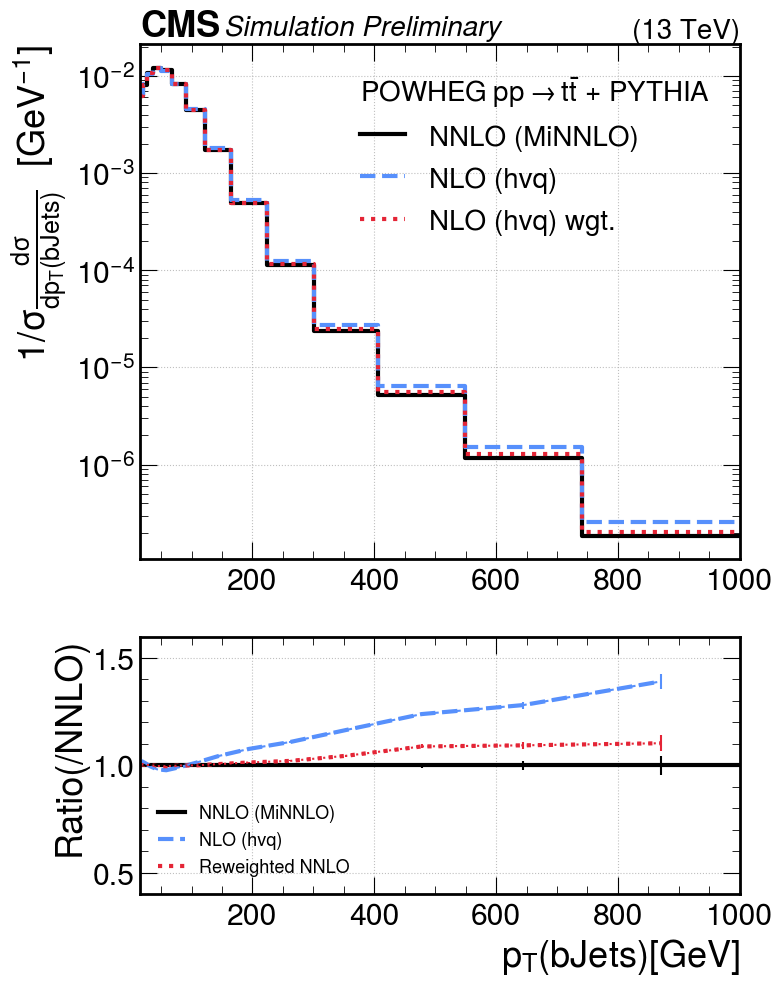

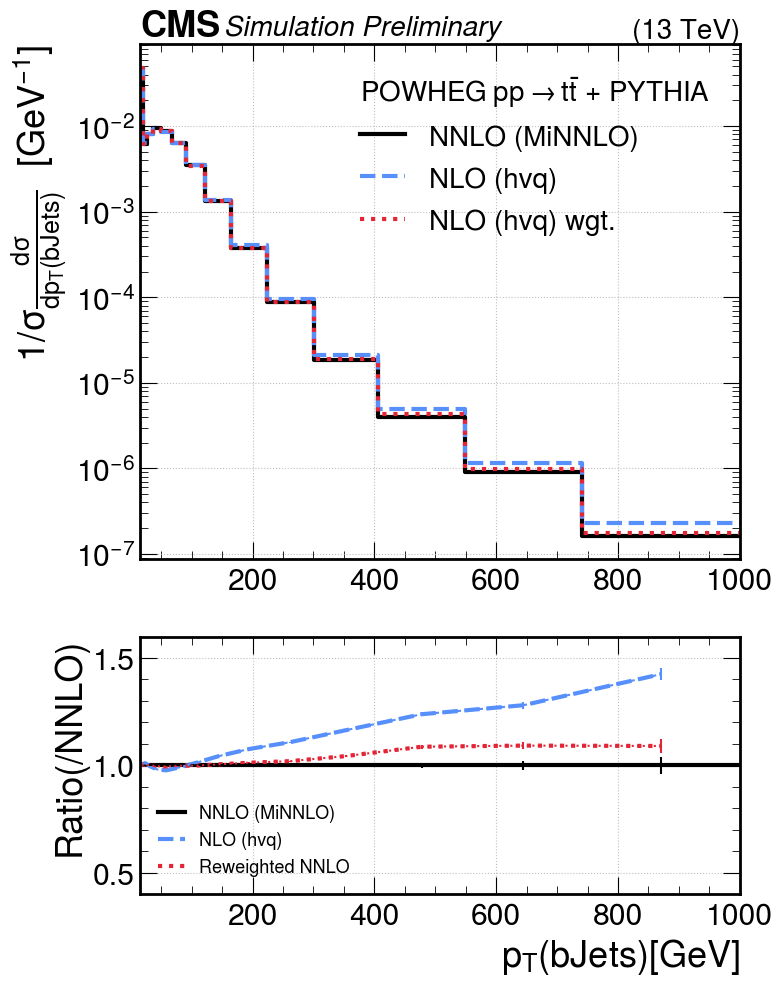

In [94]:
# b-jet pT

log_bins = np.logspace(np.log10(15), np.log10(1000), 15)
args_jet_0 = [(X1_b_jets_pt_concat, X1_wgt_concat, 'NNLO (MiNNLO)'),
              (X0_b_jets_pt_concat, X0_wgt_concat, 'NLO (hvq)'),
              (X0_b_jets_pt_concat, dctr_rwgt_concat, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_0, y_scale = 'log', part_label='b Jets', ratio_ylim=(0.4, 1.6), bins = log_bins, pythia_text=pythia_text)


In [60]:
print(X0_W_lepton.shape)
print(X1_W_lepton.shape)


(9656913, 2, 7)
(9656913, 2, 7)


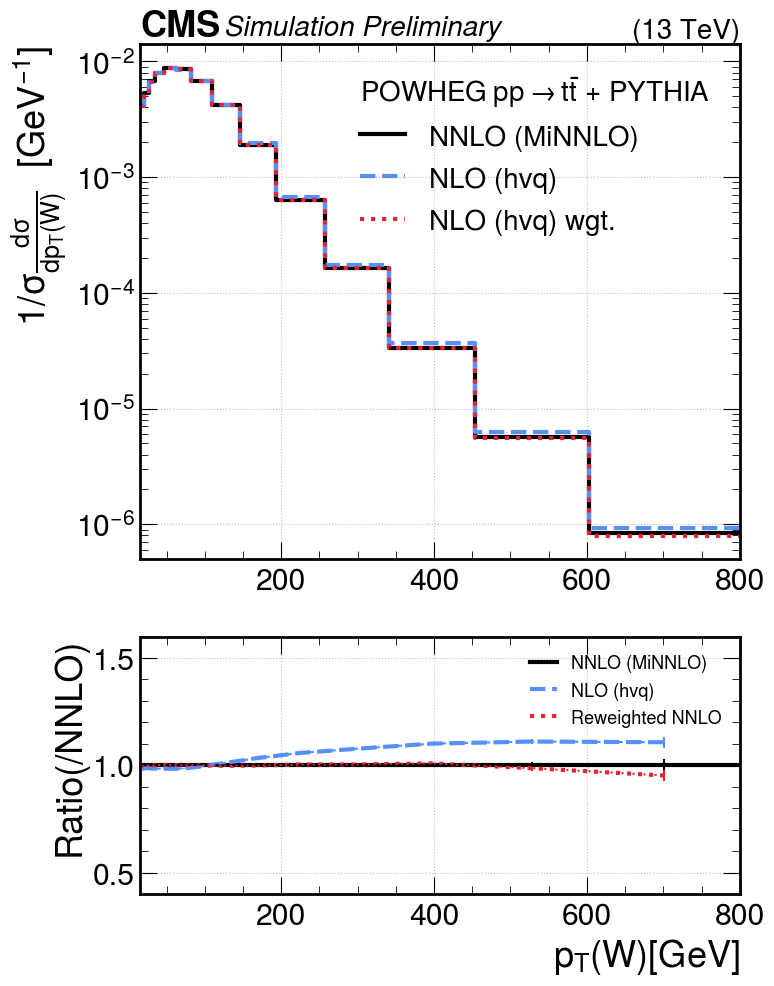

In [98]:
# W

log_bins = np.logspace(np.log10(15), np.log10(800), 15)
args_jet_0 = [(X1_W_lepton[:,0,0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_W_lepton[:,0,0], X0_wgt, 'NLO (hvq)'),
              (X0_W_lepton[:,0,0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_0, y_scale = 'log', part_label='W', ratio_ylim=(0.4, 1.6), bins = log_bins, pythia_text=pythia_text)


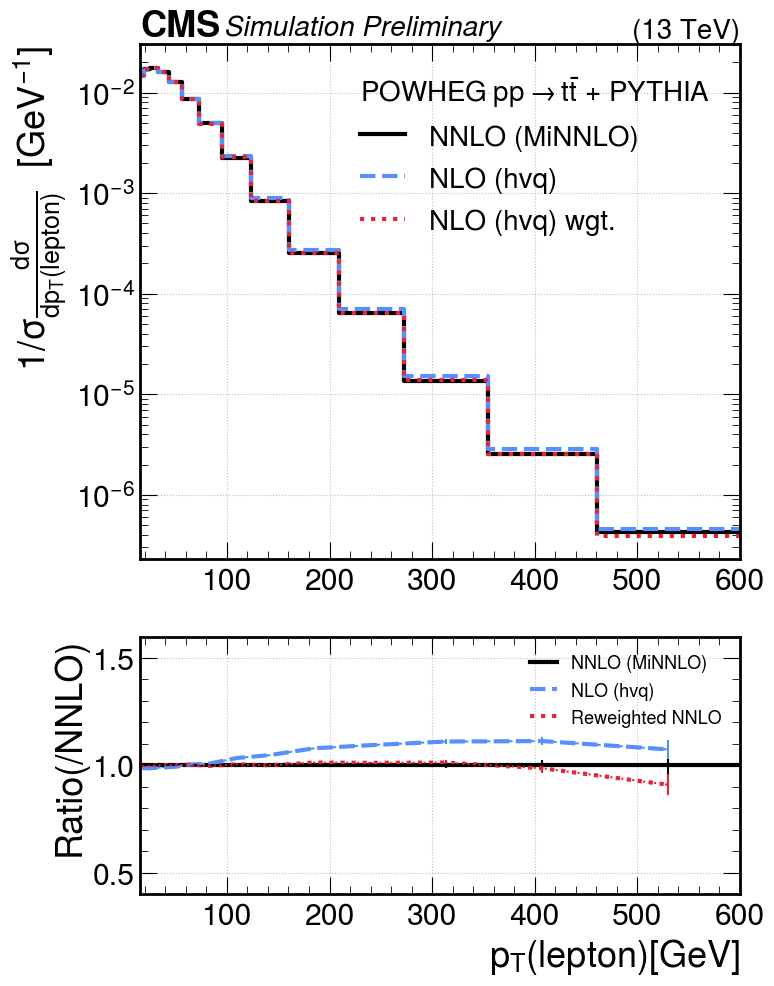

In [99]:
# lepton

log_bins = np.logspace(np.log10(15), np.log10(600), 15)
args_jet_0 = [(X1_W_lepton[:,1,0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_W_lepton[:,1,0], X0_wgt, 'NLO (hvq)'),
              (X0_W_lepton[:,1,0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_0, y_scale = 'log', part_label='lepton', ratio_ylim=(0.4, 1.6), bins = log_bins, pythia_text=pythia_text)


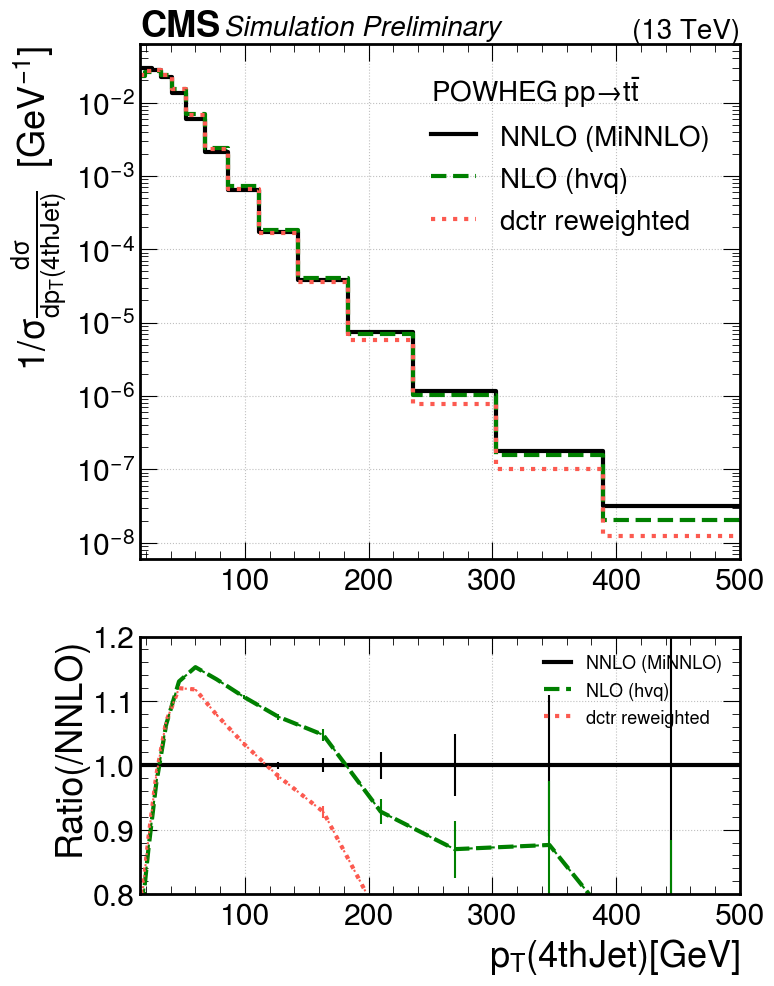

In [ ]:
log_bins = np.logspace(np.log10(15), np.log10(500), 15)
args_jet_3 = [(X1_jet[:, 3, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 3, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 3, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_3, y_scale = 'log', part_label='4th Jet', ratio_ylim=(0.8, 1.2) , bins = log_bins)


In [ ]:
# sum of jet pt per event

X0_jet_pt_sums = []
for event in X0_jet:
    X0_jet_pt_sums.append(np.sum(event[:,0]))

X1_jet_pt_sums = []
for event in X1_jet:
    X1_jet_pt_sums.append(np.sum(event[:,0]))

    
print(f'{np.shape(X0_jet_pt_sums) = }')
print(f'{np.shape(X1_jet_pt_sums) = }')


np.shape(X0_jet_pt_sums) = (9686913,)
np.shape(X1_jet_pt_sums) = (9686913,)


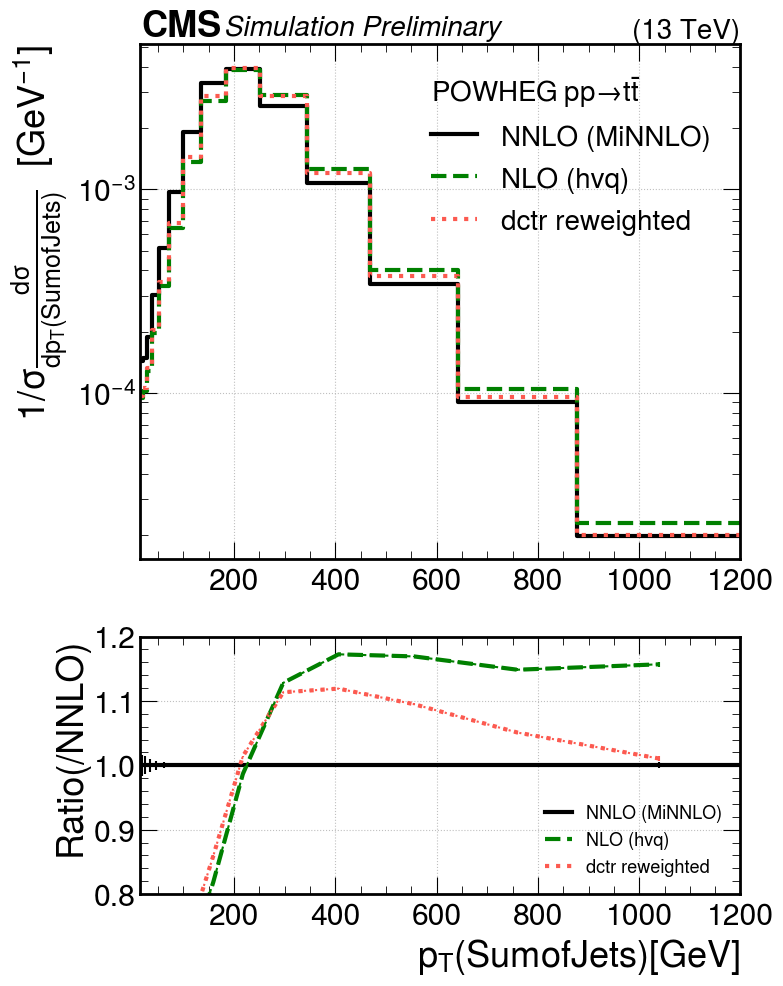

In [ ]:
args_jet_sum = [(np.array(X1_jet_pt_sums), X1_wgt, 'NNLO (MiNNLO)'),
                (np.array(X0_jet_pt_sums), X0_wgt, 'NLO (hvq)'),
                (np.array(X0_jet_pt_sums), dctr_rwgt, 'NLO (hvq) wgt.')]

log_bins = np.logspace(np.log10(15), np.log10(1200), 15)
lin_bins = np.linspace(15, 800, 15)

DCTR.plot_ratio_cms(args_jet_sum, bins = log_bins, y_scale = 'log', part_label='Sum of Jets', ratio_ylim=(0.8, 1.2))

